# Final Project - Group 17

# Twitter sentimental analysis for Walmart using Textblob

In [87]:
# import the required library functions 
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abler\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Connecting to the twitter API

In [88]:

def connect():
  # Replace the xxxxx with your twitter api keys
  consumer_key = 'sSqVvgfxuNSKC3GU3IAevzJ02'
  consumer_secret = 'inuB4PCT8yOb5N1BSgyXeLCeXTCkHPvka89o2sa2klnBjSiMv6'
  access_token = '578966187-6Yk1RZskg9GMHxtwkCQYW8TVOu36DJP6kkGKUdU6'
  access_token_secret = 'UyLfSffMJrZdLdEUT27lCmsCXa8hLkcCUgk3ER1hMn7z9'

  try:
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api
  except:
    print("Error")
    exit(1)

## Cleaning the data

In [89]:
def cleanText(text):
  text = text.lower()
  # Removes all mentions (@username) from the tweet since it is of no use to us
  text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    
  # Removes any link in the text
  text = re.sub('http://\S+|https://\S+', '', text)

  # Only considers the part of the string with char between a to z or digits and whitespace characters
  # Basically removes punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Removes stop words that have no use in sentiment analysis 
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if not word in stopwords.words()]

  text = ' '.join(text)
  return text

## Stemming

In [90]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

## Sentiment based on polarity

In [91]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'positive'

## Fetching tweets

In [92]:
def fetch_tweets(query, count = 2000):
  api = connect() # Gets the tweepy API object
  tweets = [] # Empty list that stores all the tweets

  try:
    # Fetches the tweets using the api
    fetched_data = api.search(q = query + ' -filter:retweets', count = count)
    for tweet in fetched_data:
      txt = tweet.text
      clean_txt = cleanText(txt) # Cleans the tweet
      stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
      sent = sentiment(stem_txt) # Gets the sentiment from the tweet
      tweets.append((txt, clean_txt, sent))
    return tweets
  except tweepy.TweepError as e:
    print("Error : " + str(e))
    exit(1)

## searching with query as walmart

In [93]:
tweets = fetch_tweets(query = 'walmart', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('data_walmart.csv', index= False)

In [94]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 91.0 %
Negative tweets 9.0 %


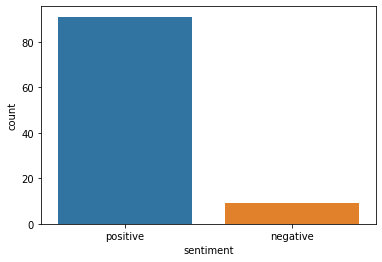

In [95]:
sns.countplot(x="sentiment", data= df )
plt.show()

## Wordcloud

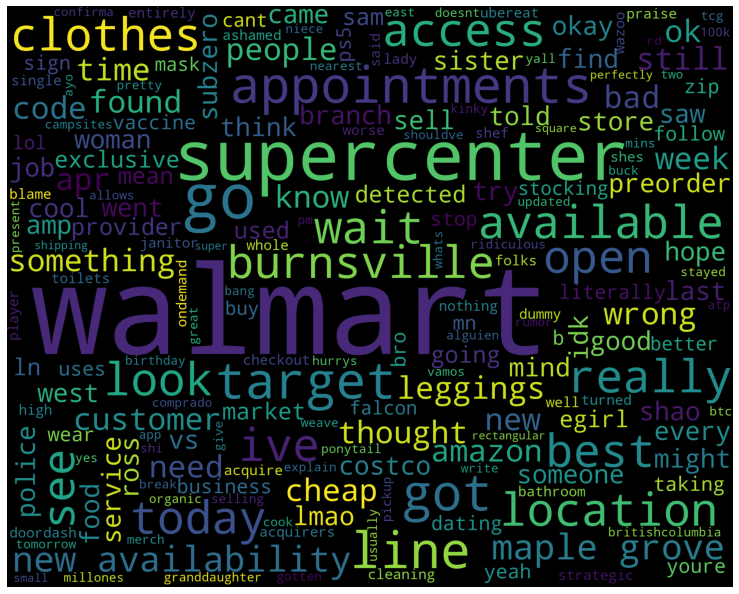

In [96]:
twt = " ".join(df['clean_tweets'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Analysis by comparing with competitors of walmart 

### Comparison with Amazon

In [97]:
tweets = fetch_tweets(query = 'amazon', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('amazon.csv', index= False)

In [98]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 93.05555555555556 %
Negative tweets 6.944444444444445 %


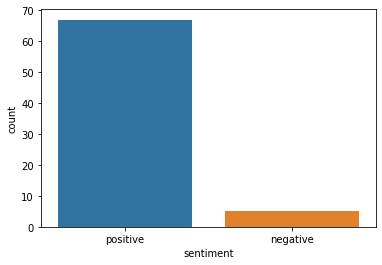

In [99]:
sns.countplot(x="sentiment", data= df )
plt.show()

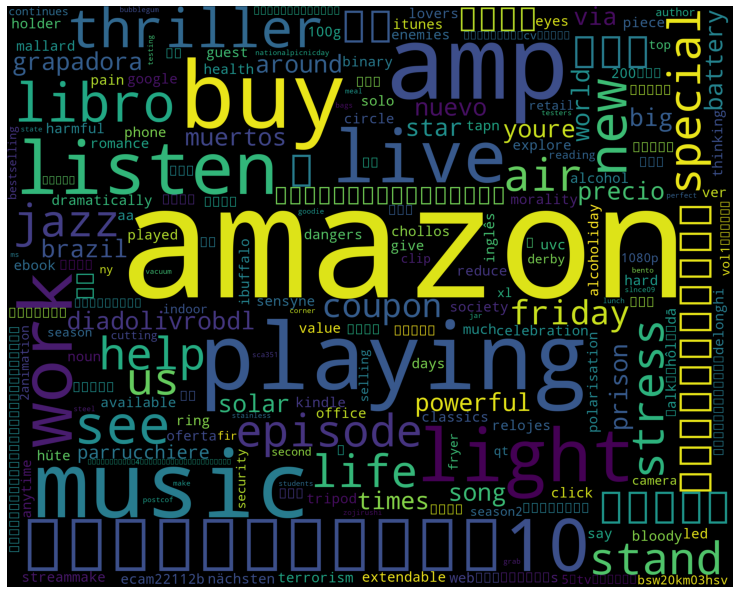

In [101]:
twt = " ".join(df['clean_tweets'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=2500, height=2000).generate(twt)

plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Analysis based on events like black friday

### a)Walmart

In [102]:
tweets = fetch_tweets(query = 'walmart black friday', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('walmart_bf.csv', index= False)

In [103]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 39.285714285714285 %
Negative tweets 60.714285714285715 %


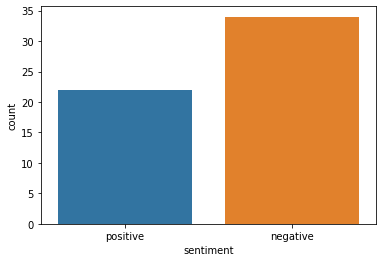

In [104]:
sns.countplot(x="sentiment", data= df )
plt.show()

### b)Amazon

In [105]:
tweets = fetch_tweets(query = 'amazon black friday', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('amazon_bf.csv', index= False)

In [106]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 48.93617021276596 %
Negative tweets 43.61702127659574 %


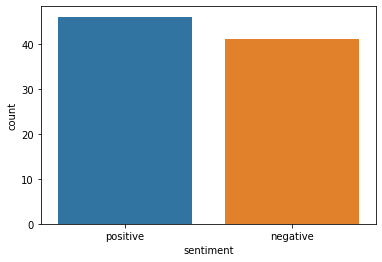

In [108]:
sns.countplot(x="sentiment", data= df )
plt.show()

### c)bBest Buy

In [109]:
tweets = fetch_tweets(query = 'bestbuy black friday', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('bestbuy_bf.csv', index= False)

In [110]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 75.0 %
Negative tweets 25.0 %


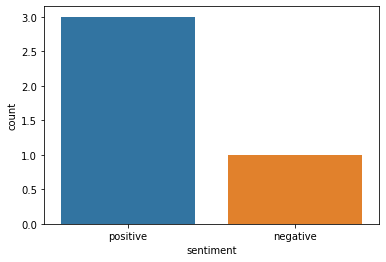

In [111]:
sns.countplot(x="sentiment", data= df )
plt.show()

## Analysis based on grocery

### a) Walmart

In [112]:
tweets = fetch_tweets(query = 'walmart grocery', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('walmart_grocery.csv', index= False)

In [113]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 87.0 %
Negative tweets 13.0 %


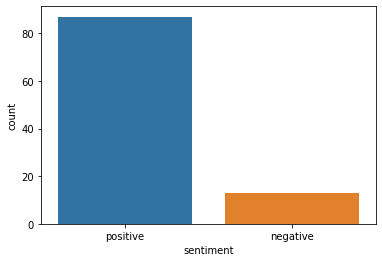

In [114]:
sns.countplot(x="sentiment", data= df )
plt.show()

### b)freshco

In [118]:
tweets = fetch_tweets(query = 'freshco grocery', count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('freshco_grocery.csv', index= False)

In [119]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 52.63157894736842 %
Negative tweets 18.42105263157895 %


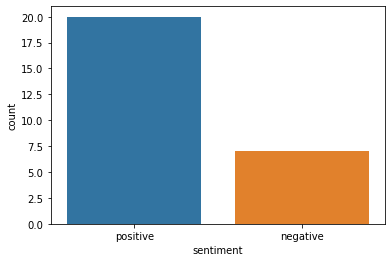

In [120]:
sns.countplot(x="sentiment", data= df )
plt.show()